In [1]:
# extracting features of a single audio file
import os
import librosa
audio_file_path='audio/fold1/7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
import tensorflow as tf

In [3]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0231203e-05 2.3116412e-05
 0.0000000e+00]


In [4]:
librosa_sample_rate

22050

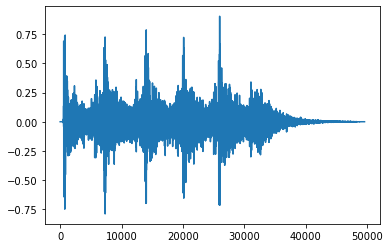

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(librosa_audio_data)


In [6]:
# Extract features using MFCC

In [7]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
mfccs.shape

(40, 97)

In [8]:
mfccs

array([[-9.3800201e+01,  7.4964676e+00,  1.5476106e+01, ...,
        -5.6935333e+02, -5.9172742e+02, -6.1055634e+02],
       [ 3.0774033e+01,  2.3719746e+01,  1.1416364e+01, ...,
         4.3051193e+01,  2.5888165e+01,  1.2927567e+01],
       [-3.2866516e+00, -1.2030355e+01, -1.5005076e+01, ...,
        -1.1103722e+01, -7.5504947e+00,  2.2212185e-01],
       ...,
       [ 6.4266616e-01, -3.2603271e+00, -4.7559175e+00, ...,
         2.4095774e+00,  3.1699085e+00, -1.5433559e-01],
       [-1.0001831e+01, -9.3599148e+00, -6.4467368e+00, ...,
        -5.0200582e-02,  7.2894025e-01, -8.3965683e-01],
       [ 1.9421940e+00,  2.0736120e+00,  3.0683596e+00, ...,
        -2.0609193e+00, -2.2312040e+00, -1.7239641e+00]], dtype=float32)

In [9]:
# Extracting MFCC for every audio file

In [10]:
import pandas as pd
import os

audio_dataset_path='audio/'
metadata=pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def features_extractor(file_name):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    final_class_labels=row['class']
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

3555it [13:08,  4.54it/s]/home/kali/.local/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [30:23,  6.08it/s]/home/kali/.local/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [30:23,  8.10it/s]/home/kali/.local/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [31:45,  4.58it/s]


In [13]:
#convert extracted features to pandas dataframe

extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.80034, -47.92471, 53.265694, ...",children_playing
3,"[-414.55377, 102.896904, -36.664955, 54.18041,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [14]:
#split dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(8732, 40)

In [16]:
X

array([[-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, ...,
        -1.6827592e+00, -8.8585865e-01,  3.5438886e-01],
       [-4.2468677e+02,  1.1056227e+02, -5.4148235e+01, ...,
         6.1740851e-01, -6.8497419e-01,  5.7151443e-01],
       [-4.5956467e+02,  1.2280034e+02, -4.7924709e+01, ...,
         2.2254140e+00,  1.5466180e+00, -8.3631569e-01],
       ...,
       [-3.0461316e+02,  1.1261990e+02, -4.7161945e+01, ...,
        -3.0335813e+00,  2.7105730e+00,  7.6718950e+00],
       [-3.4471423e+02,  1.2675813e+02, -5.6177170e+01, ...,
        -7.8022585e+00, -1.7790737e+00,  5.8354192e+00],
       [-3.1593384e+02,  9.5675888e+01, -3.8047771e+01, ...,
         5.7758039e-01, -1.1463765e+01, -5.9653535e+00]], dtype=float32)

In [17]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [18]:
y.shape

(8732,)

In [19]:
#onehotencoding
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(y.reshape(-1,1)).toarray()

In [20]:
y.shape

(8732, 10)

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [22]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

# Model Creation

In [27]:
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam

In [28]:
# number of classes
num_labels=y.shape[1]
print(num_labels)

10


In [29]:
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#2nd layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#3rd layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
# training the model
num_epochs=50
num_batch_size=32
model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test))

Epoch 1/50
219/219 [==============================] - 8s 10ms/step - loss: 4.1871 - accuracy: 0.1722 - val_loss: 2.0905 - val_accuracy: 0.2404
Epoch 2/50
219/219 [==============================] - 2s 8ms/step - loss: 2.0680 - accuracy: 0.2424 - val_loss: 1.8188 - val_accuracy: 0.3183
Epoch 3/50
219/219 [==============================] - 2s 8ms/step - loss: 1.8589 - accuracy: 0.3061 - val_loss: 1.6538 - val_accuracy: 0.3875
Epoch 4/50
219/219 [==============================] - 2s 8ms/step - loss: 1.7412 - accuracy: 0.3526 - val_loss: 1.5650 - val_accuracy: 0.4013
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 1.6596 - accuracy: 0.3913 - val_loss: 1.4633 - val_accuracy: 0.4762
Epoch 6/50
219/219 [==============================] - 2s 8ms/step - loss: 1.5581 - accuracy: 0.4302 - val_loss: 1.3495 - val_accuracy: 0.5426
Epoch 7/50
219/219 [==============================] - 2s 9ms/step - loss: 1.4597 - accuracy: 0.4810 - val_loss: 1.2627 - val_accuracy: 0.5695
Epoch

In [32]:
model.evaluate(X_test,y_test,verbose=0)

[0.3894874155521393, 0.877504289150238]

In [33]:
filename='audio/fold7/6902-2-0-4.wav'
prediction_features=features_extractor(filename)
p=prediction_features.reshape(1,-1)
p=model.predict(p)
p

enc.inverse_transform(p)

array([['children_playing']], dtype='<U16')

In [34]:
if os.path.isfile('urbansound8k.h5') is False:
    model.save('urbansound8k.h5')

In [35]:
import joblib
if os.path.isfile('enc.joblib') is False:
    joblib.dump(enc,"enc.joblib")